In [1]:

import pandas as pd
df = pd.read_csv("most_popular_film.csv")

In [2]:
df.head()

,id,name,year,avg_stars,stars,review
0,tt13143964,Borat Subsequent Moviefilm: Delivery of Prodig...,2020,6.9,10,Borat Make a *Glorious* #2! Subsequent Moviefi...
1,tt13143964,Borat Subsequent Moviefilm: Delivery of Prodig...,2020,6.9,10,My husband loved SCB in all his incarnations (...
2,tt13143964,Borat Subsequent Moviefilm: Delivery of Prodig...,2020,6.9,10,"What's even funnier than the movie itself, is ..."
3,tt13143964,Borat Subsequent Moviefilm: Delivery of Prodig...,2020,6.9,10,For those saying Giuliani was just tucking in ...
4,tt13143964,Borat Subsequent Moviefilm: Delivery of Prodig...,2020,6.9,10,Nothing more needs to be said than: LOOK at th...


In [4]:
data_1 = pd.read_csv("most_popular_film.csv",usecols=["review"])

In [5]:
review = data_1.to_string()
type(review)

str

In [6]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,Text
from nltk.corpus import stopwords
import nltk


review_word = word_tokenize(review)

English_vocab = set(w.lower() for w in nltk.corpus.words.words()) #assume that nltk.corpus.words.words() returns all English terms.

stop_words = set(stopwords.words('english'))  #=remove stopwords

review_filtered = [w for w in review_word if (not w in stop_words)&(w in English_vocab)]

freqdist = nltk.FreqDist(review_filtered)
print(freqdist.most_common(10))


[('movie', 586), ('film', 472), ('first', 384), ('funny', 357), ('one', 331), ('like', 280), ('time', 201), ('people', 192), ('original', 178), ('good', 159)]


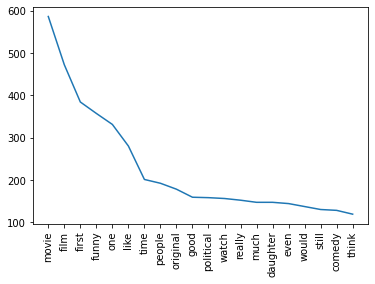

In [7]:
import matplotlib.pyplot as plt
most = nltk.FreqDist(review_filtered).most_common(20)
x,y = [],[]

for word,num in most:
    x.append(word)
    y.append(num)

plt.plot(x,y)

plt.xticks(rotation=90)
plt.show()

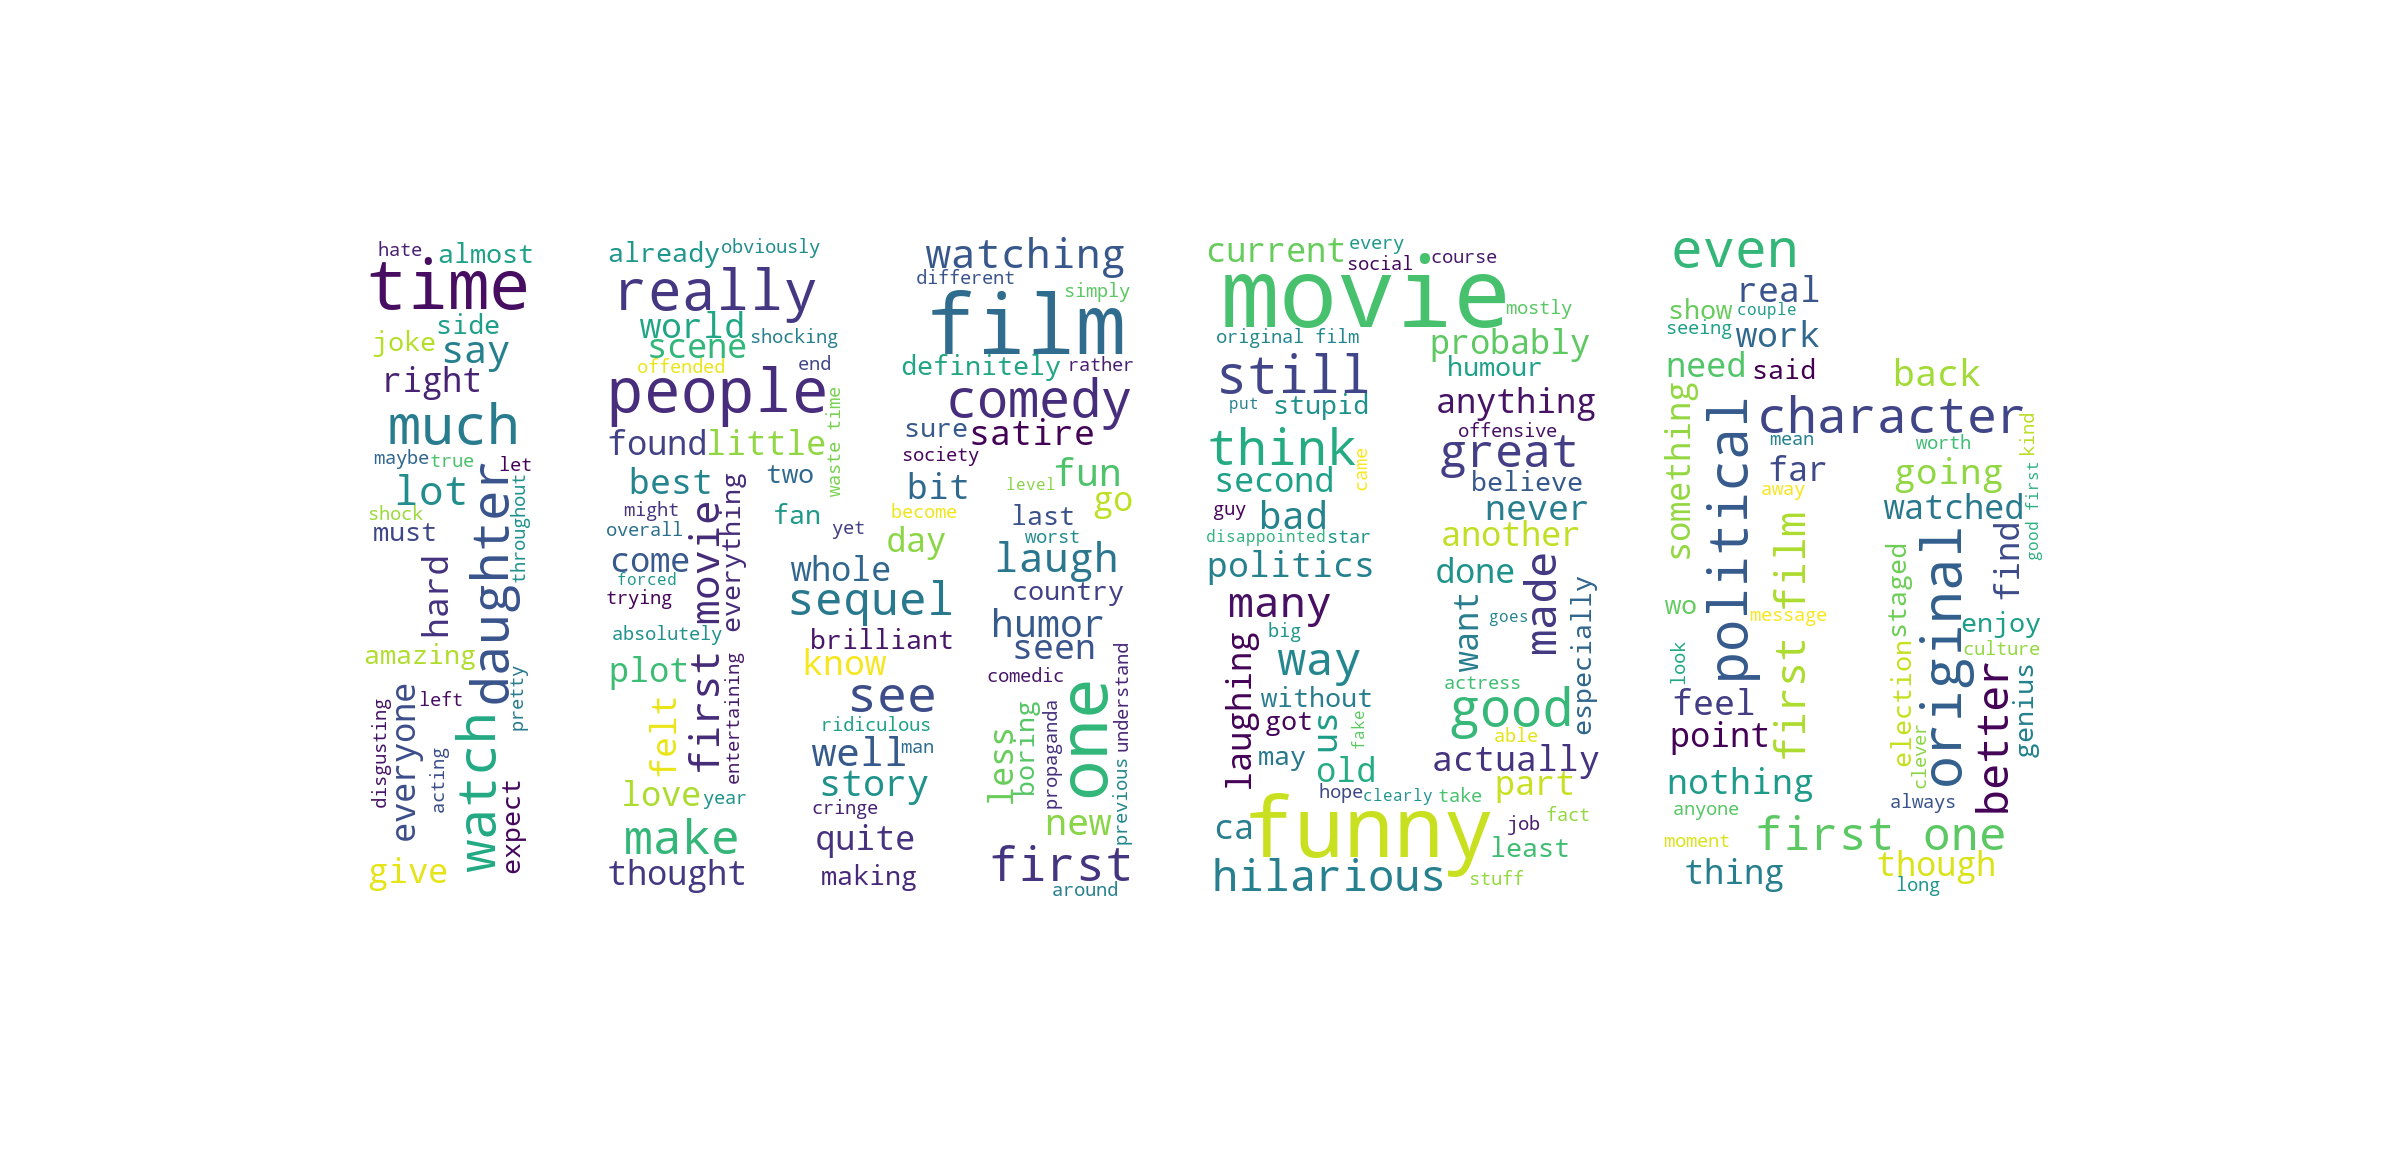

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
bkimg = plt.imread("imdb_logo.jpg")
wc = WordCloud(background_color = "white",mask=bkimg)
wc.generate(" ".join(review_filtered))
wc.to_image()

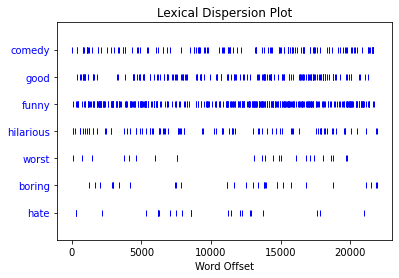

In [12]:
reviewText=Text(review_filtered)
reviewText.dispersion_plot(["comedy","good", "funny", "hilarious","worst",'boring','hate'])

In [13]:
reviewText.collocations(window_size=5)

first one; waste time; first film; social commentary; first movie;
felt like; baron cohen; huge fan; shock value; hour half; laugh loud;
debutante ball; big fan; politically incorrect; worth watch; nowhere
near; imitation maintain; father daughter; come close; mean spirited
